In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fn = 'data/data_2d_slope.csv'
dim = 2
data = np.loadtxt(open(fn, "rb"), delimiter=",", skiprows=1)
x = data[:,0:dim]
p = data[:,dim]
h = data[:,dim+1]
n_samples = len(x)

In [5]:
from  sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=40)

In [7]:
group = km.fit_predict(x)

In [8]:
with open('data/2d_slope_for_ihw.csv', 'w') as f:
    f.write('x_value, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}\n".format(group[i],p[i], h[i]))

In [9]:
weights = np.loadtxt(open('archive/ihw2dgmweights2.csv', "rb"), delimiter=",", skiprows=1, usecols=(1,2,3,4,5))

In [10]:
x_grid = np.arange(-1, 1, 1/100.0)
y_grid = np.arange(-1, 1, 1/100.0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

In [11]:
input = np.concatenate([np.expand_dims(X_grid.flatten(),1), np.expand_dims(Y_grid.flatten(),1)],1).astype(np.float32)

In [12]:
group2 = km.predict(input)

In [13]:
w = weights.mean(axis = 1)

In [14]:
wg = w[group2]

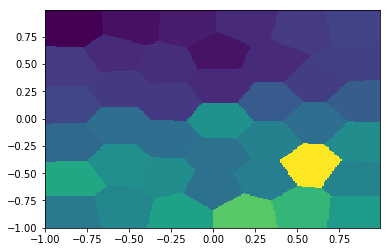

In [15]:
plt.pcolor(X_grid, Y_grid, wg.reshape(200,200))

In [16]:
np.savetxt('ihw_wg2.txt', wg)